# Regularization (Ridge and Lasso regression)

## 1. Regularization on simulated data

As you may recall, when doing OLS we are minimizing the sum of squared errors between the model and the data.  The idea of minimizing some quantity is common to many model fitting and optimization problems, and the thing we are minimizing is referred as a **cost function**.

For OLS, the cost function is:

$$\sum_{i=1}^N (y_i - \hat{y}_i)^2$$

where $y_i$ is the observed value of the target for observation $i$, and $\hat{y}_i$ denotes the value predicted by the model.  The techniques we will talk about in this notebook are based on modifications to this cost function.

In [ ]:
# Generate simulated data

import numpy as np
import matplotlib.pyplot as plt

n = 10
noise_strength = 1
np.random.seed(147)
noise = np.random.normal(scale=noise_strength, size=(n,1))
x = np.random.normal(size=(n,1))
y = 1 + 2*x + noise

In [ ]:
# Put simulated x and y into a dataframe

import pandas as pd
df = pd.DataFrame(columns = ['x','y'])
df['x'] = x.ravel()
df['y'] = y.ravel()
df

In [ ]:
# assign a value of 0.2 to df.loc[4,'y'] 

df.loc[4,'y'] = 0.2
df

In [ ]:
# Generating "the" four items 
#-- use the visualization trick in class to understand what they are

idx_test = [1,7]
Xtest = df.loc[idx_test,'x']
ytest = df.loc[idx_test,'y']
Xtrain = df.drop(idx_test)['x']
ytrain = df.drop(idx_test)['y']

In [ ]:
Xtrain, ytrain
Xtest, ytest

In [ ]:
# plot the train and test data with scatterplot

plt.scatter(Xtrain,ytrain, label='Training data', color='k')
plt.scatter(Xtest, ytest, label = 'Test data', color = 'blue')
#plt.title('Our randomly generated data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Fit with a normal linear regression model

from sklearn.linear_model import LinearRegression as LR, Ridge, Lasso
Xtrain = np.array(Xtrain).reshape(-1,1)
Xtest = np.array(Xtest).reshape(-1,1)
lin_reg = LR()
lin_reg.fit(Xtrain, ytrain)

# print train and test R^2 values
print(lin_reg.score(Xtrain, ytrain))
print(lin_reg.score(Xtest, ytest))

In [ ]:
print(lin_reg.intercept_, lin_reg.coef_)

<b>Ridge</b> regression step!

In [ ]:
# Ridge regression

rid_reg = Ridge(alpha = 2)
rid_reg.fit(Xtrain, ytrain)

print(rid_reg.score(Xtrain, ytrain))
print(rid_reg.score(Xtest,ytest))

In [ ]:
print(rid_reg.intercept_, rid_reg.coef_)

In [ ]:
# Ridge regression with a larger alpha

rid_reg2 = Ridge(alpha = 100)
rid_reg2.fit(Xtrain, ytrain)

print(rid_reg2.score(Xtrain, ytrain))
print(rid_reg2.score(Xtest,ytest))

In [ ]:
print(rid_reg2.intercept_, rid_reg2.coef_)

In [ ]:
# Visualize the regular linear regression model and the two Ridge regression models

x_range = [min(x), max(x)]

# three y_ranges, one for each model
y_pred = lin_reg.predict(x_range)
y_ridge = rid_reg.predict(x_range)
y_ridge2 = rid_reg2.predict(x_range)

plt.figure(figsize = (10,6))
# plot Train and test data
plt.scatter(Xtrain.ravel(),ytrain, label='Train data', color='k')
plt.scatter(Xtest.ravel(), ytest, label = 'Test data', color = 'green', s = 100)
# plot the models
plt.plot(x_range, y_pred, label='Linear_regression', color='r')
plt.plot(x_range, y_ridge, label = 'Ridge_alpha_2', color = 'blue', linestyle = '--')
plt.plot(x_range, y_ridge2, label = 'Ridge_alpha_100', color = 'grey', linestyle = '-.')
#plt.title('')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<b>Lasso</b> regression step!

In [ ]:
# Lasso regression

las_reg = Lasso(alpha = 100)
las_reg.fit(Xtrain, ytrain)
print(las_reg.score(Xtrain, ytrain))
print(las_reg.score(Xtest,ytest))

## 2. Regularization on real data

### 2.1 Regular linear regression

In [1]:
#Use pockets data
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts
# be sure to upload the intro_Data.py file so that it can be imported
from intro_Data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
help(do_Kfold)

Help on function do_Kfold in module intro_Data:

do_Kfold(model, X, y, k, scaler=None, random_state=146)



In [3]:
pockets = pd.read_csv('./data/pockets.csv')
pockets.head()

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout
0,Arizona,skinny,women,Fave Super Skinny,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,False
1,Arizona,straight,women,Perfect Boot,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,False
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,False
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,False
4,Uniqlo,skinny,women,Skinny Fit,"87% cotton, 9% polyester, 4% spandex",39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,False


In [4]:
# Use maxheightfront as the target and the other numeric variables as features

metadata = pockets[['brand','style','menWomen', 'cutout']]
X_df = pockets.drop(columns = list(metadata.columns)
                          + ['name', 'fabric', 'maxHeightFront'])
X = np.array(X_df.values)
y = np.array(pockets['maxHeightFront'].values).reshape(-1,1)

<Axes: >

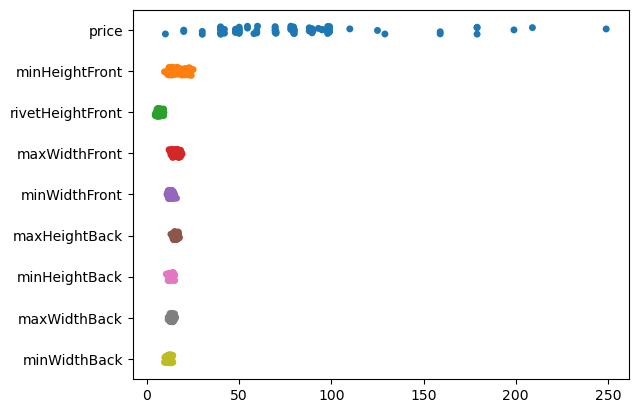

In [8]:
#Does this data need to be scaled? Not for OLS, but will need later
sns.stripplot(data = X_df, orient = 'h')

In [ ]:
help(do_Kfold)

In [9]:
# use do_Kfold function to get train/test scores
# try without rescaling first
lin_reg = LR()
train_res, test_res = do_Kfold(lin_reg, X,y,10) 

In [11]:
np.shape(test_res)

(10,)

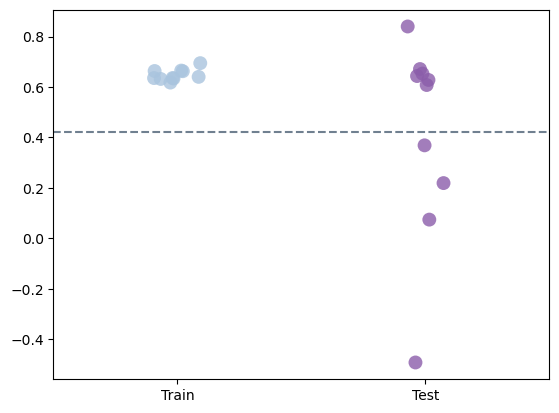

In [13]:
# visualize train/test scores by stripplot

import seaborn as sns
df = pd.DataFrame(zip(train_res,test_res), columns = ['Train','Test'])
sns.stripplot(data = df, size = 10, alpha = 0.8, palette = 'BuPu')
plt.axhline(np.mean(test_res), c = 'slategrey', linestyle = '--')
plt.show()

In [12]:
print(np.mean(train_res), np.median(train_res))
print(np.mean(test_res), np.median(test_res))

0.6481278808366254 0.6380743980948804
0.42150969601454563 0.618056921843455


### 2.2 Ridge regression

So, we have a slightly overfit model.  As we've discussed, this can be caused by a model that is too complex (too many parameters), so one solution might be to reduce the complexity of the model.

This brings us to **regularization techniques**.  The goal of regularization is to reduce the complexity of the model and possibly prevent (or reduce) overfitting.

The first technique we will look at is called **Ridge regression**.  In addition to minimizing the sum of squared errors, Ridge regression also penalizes a model for having more parameters and/or larger parameters.  This is accomplished by modifying the cost function:

$$\sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^p \beta_i^2 $$

The new term in this equation, $\alpha \sum_{i=1}^p \beta_i^2$, is called the **regularization** term.  In words, it just says to square all of the model coefficients, add them together, multiply that sum by some number ($\alpha$) and then add that to the cost function.  The result of this is that the model will be simultaneously trying to minimize both the sum of the squared errors as well as the number/magnitude of the model's parameters.

As a reminder, the equation for our model looks like:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_p x_p$$

and nothing about this has changed - we have only modified the cost function that is going to be minimized.

This modification also adds an additional layer of complexity to the fitting and validation procedures.  The number $\alpha$ is referred to as a **hyperparameter** - which is a number that is not determined during the fitting/training procedure.  Different values of $\alpha$ will lead to different results, and we will have to find the optimal value ourselves.


#### Test Your Understanding:

1. What is the purpose of regularization?  What are we trying to accomplish with this particular data/model?
2. What is a regularization term?
3. What is a hyperparameter?
4. How our results are going to be different after we apply regularization?
5. How do you think we are going to go about finding the optimal value for the hyperparameter $\alpha$?

___

#### Planning our approach

Since there will be a few more steps involved here, it will be useful to think about what we need to do before we start writing code.  Carefully planning out your approach and listing out what will need to be done can save you a lot of time in the long run.

Here's what we will need to do:

1. Determine some range of values for $\alpha$ to test the model
2. For each value in that range...
3. Do $K$-Fold validation
4. Compare training and testing scores to determine where the model is the least overfit
5. If the best performance occurs for the minimum or maximum alpha we looked at, adjust the range of values we are considering and repeat the process.

It's also going to be important to standardize our features for these models, since the relative size of each of the variables will impact the coefficient estimates, which are now built into the cost function.  If we do not standardize our data, then some coefficients might end up being minimized simply due to the units they were measured in, rather than their actual predictive power in the model.  

Since the testing data is data that is being used to simulate new data that we did not have when training the model, when standardizing, **we should compute the mean and standard deviation from only the training data**.  We will then apply the same transformation to the testing data - but we will not include the testing data when we compute the mean and standard deviation.

In order to determine what value of $\alpha$ gives the best performance, we're just going to scan through a range of values.  There is usually going to be some trial and error involved in things like this, and there's no guarantee that we'll start anywhere close to the best answer!

Let's pause to think about our next steps a little more:

- For each value of $\alpha$ we're going to do a $K$-fold validation
- For each $K$-fold validation, we're going to get a list of training and testing scores
- That could potentially be a lot of info to keep track of!
- Instead of storing all the scores from each validation run, I'll keep track of the averages

We'll make a plot to examine our results and use it to guide our next steps throughout this process.  We can plot the $\alpha$ values on the x-axis, and the average training/testing scores on the y-axis.

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler as SS

In [17]:
# search the best alpha value

a_range = np.linspace(10,20,100)
k = 10
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    rid_reg = Ridge(alpha=a)
    train_scores, test_scores = do_Kfold(rid_reg, X, y, k, ss)
    
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))
    #print(a, np.mean(test_scores))

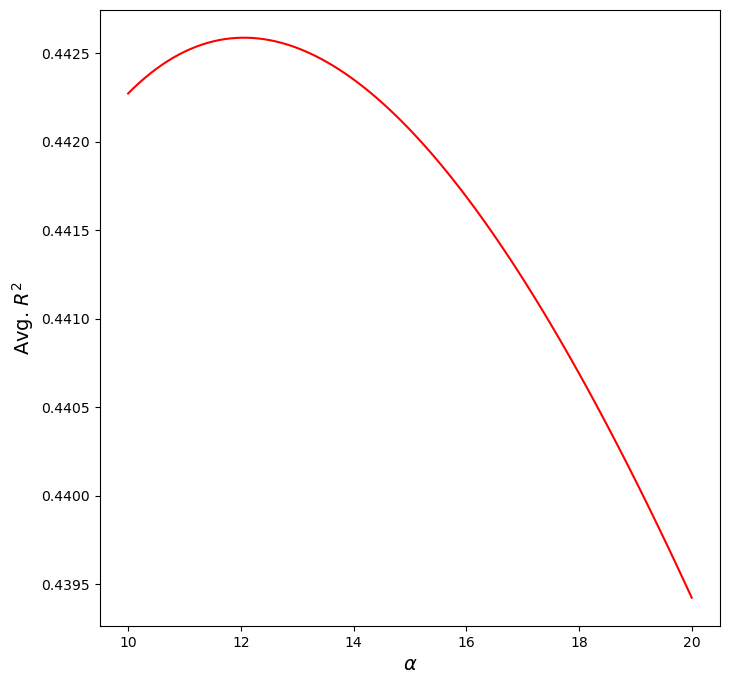

In [18]:
# plot the score-alpha curve

plt.figure(figsize=(8,8))
#plt.plot(a_range, avg_tr_score, color='k', label='Training')
plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
#plt.legend()
plt.show()

In [19]:
# Get the optimal hyperparameter alpha and its corresponding scores

idx_max = np.argmax(avg_te_score)

print('Optimal alpha in the range tested: ', a_range[idx_max])
print('Avg. training score at this value: ', avg_tr_score[idx_max])
print('Avg. testing score at this value: ', avg_te_score[idx_max])

Optimal alpha in the range tested:  12.02020202020202
Avg. training score at this value:  0.6344576593800286
Avg. testing score at this value:  0.44258643208744763


After a bit of searching, we've managed to increase the model performance a bit.  The training score is still similar to the OLS solution, but we've managed to increase the testing score a bit.  It's a small improvement, but an improvement nonetheless!

To reinforce what exactly is going on here, let's take a look at the <b>model coefficients</b> compared to the OLS solution.  I'll make a plot showing how the coefficients are changing as we adjust $\alpha$.  We will fit both types of models to the full data set - this is what you would do in practice after KFold validation...though we did make one mistake - we should have set aside some data to test that model on!

In [25]:
# fit an OLS model and get coefficients

Xs = ss.fit_transform(X)
lin_reg.fit(Xs,y)
lin_coefs = lin_reg.coef_[0]

lin_coefs

array([-0.35161376,  1.92356316,  1.4028077 , -0.36014987,  1.37946072,
        1.66568514,  0.17595748, -0.36056614, -1.21507708])

In [27]:
# fit a Ridge model and get coefficients

rid_reg = Ridge(alpha = a_range[idx_max])
rid_reg.fit(Xs, y)
rid_coefs = rid_reg.coef_[0]

rid_coefs

array([-0.27768022,  1.72217699,  1.14585851, -0.05468923,  1.04316768,
        1.15328581,  0.49688341, -0.36724293, -0.75164045])

In [28]:
# get the side-by-side comparison of coefficients

compare = pd.DataFrame(data=zip(lin_coefs,rid_coefs),index=X_df.columns,
                      columns = ['OLS','Ridge'])
compare

,OLS,Ridge
price,-0.351614,-0.277680
minHeightFront,1.923563,1.722177
rivetHeightFront,1.402808,1.145859
maxWidthFront,-0.360150,-0.054689
minWidthFront,1.379461,1.043168
maxHeightBack,1.665685,1.153286
minHeightBack,0.175957,0.496883
maxWidthBack,-0.360566,-0.367243
minWidthBack,-1.215077,-0.751640


In [29]:
# get coefficients for a range of alpha values

a_range = np.linspace(0,1000,100)
rid_coefs = []
for a in a_range:
    rid_reg = Ridge(alpha=a)
    rid_reg.fit(Xs,y)
    rid_coefs.append(rid_reg.coef_[0])

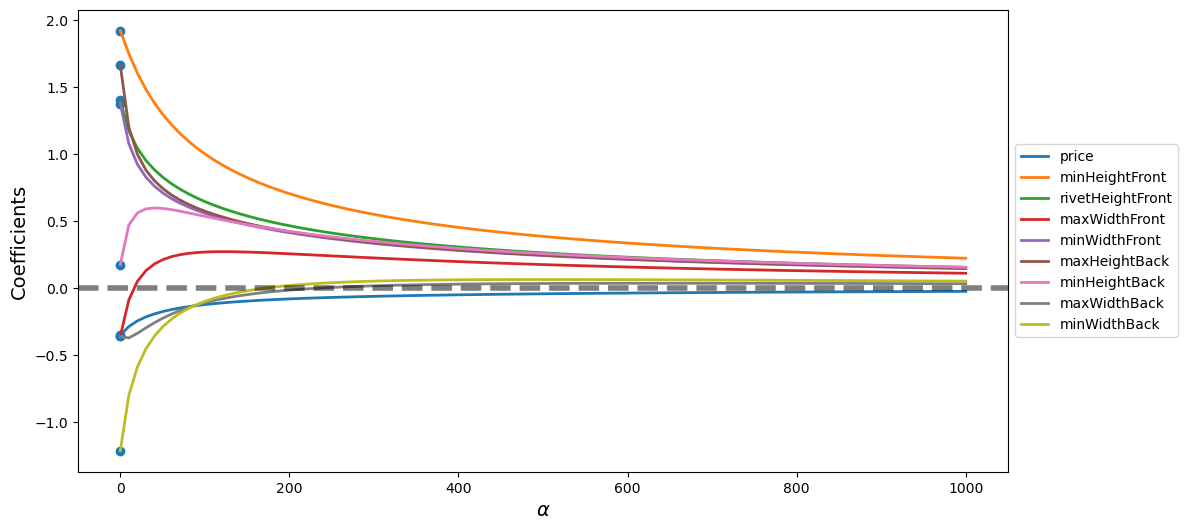

In [34]:
# visualize coefficients-alpha relation (one line for each coefficient beta_i)

plt.figure(figsize=(12,6))
plt.plot(a_range, rid_coefs, linewidth = 2)
plt.axhline(0, linewidth = 4, c = 'black', linestyle = '--', alpha = 0.5)
plt.scatter([0]*len(lin_coefs), lin_coefs)
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Coefficients', fontsize=14)
plt.legend(X_df.columns, bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

### 2.3 Lasso regression

Lasso regression is very similar to Ridge regression, although the results can be quite a bit different!  The only difference between the two methods is the regularization term.  For Lasso, the cost function is:

$$\sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^p |\beta_i| $$

That is, instead of squaring the coefficients, we are taking their absolute value.  Although this might not seem like a big difference, it has a very interesting consequence:
 - Lasso can set some of the model coefficients to zero, effectively removing variables from your model.
 
The implementation, however, is identical:

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# optimal alpha value search

a_range = np.linspace(1e-5,0.2,100)
k = 10
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    las_reg = Lasso(alpha=a)
    train_scores, test_scores = do_Kfold(las_reg, X, y, k, ss)
    
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))

In [ ]:
# plot score-alpha value curve

plt.figure(figsize=(8,8))
#plt.plot(a_range, avg_tr_score, color='k', label='Training')
plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
plt.legend()
plt.show()

In [ ]:
# find the optimal alpha and its corresponding scores

idx_max = np.argmax(avg_te_score)

print('Optimal alpha in the range tested: ', a_range[idx_max])
print('Avg. training score at this value: ', avg_tr_score[idx_max])
print('Avg. testing score at this value: ', avg_te_score[idx_max])

In [ ]:
# find the coefficients of the Lasso model with the optimal alpha

las_reg = Lasso(alpha = a_range[idx_max])
las_reg.fit(Xs, y)
las_coefs =las_reg.coef_
las_coefs

In [ ]:
# add las_coefs as an additional column to compare

compare['Lasso'] = las_coefs
compare

In [ ]:
# Get coefficents of Lasso models for a range of alpha values

a_range = np.linspace(1e-6,10,100)
las_coefs = []
for a in a_range:
    las_reg = Lasso(alpha=a)
    las_reg.fit(Xs,y)
    las_coefs.append(las_reg.coef_)

In [ ]:
# visualize the coefficients-alpha relation

plt.figure(figsize=(12,6))
plt.plot(a_range, las_coefs)
plt.scatter([0]*len(lin_coefs), lin_coefs)
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Coefficients', fontsize=14)
plt.legend(X_df.columns, bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

In [ ]:
# what's the relation between coefficients and correlation?

X_numeric = X_df.copy()
X_numeric['target'] = y

X_numeric.corr()